In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/kdd_cpp.csv")

In [ ]:
df.shape

(494021, 42)

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [ ]:
df['class'].unique()

array(['normal', 'anomaly'], dtype=object)

In [ ]:
columns_name = df.columns
columns_name

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [ ]:
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:",duplicate_rows.shape)
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Duplicate Rows: (348436, 42)
Shape after removing duplicates: (145585, 42)


In [ ]:
df = df[['count', 'src_bytes', 'service', 'dst_bytes', 'dst_host_same_src_port_rate', 'srv_count', 'logged_in', 'dst_host_count', 'protocol_type', 'dst_host_srv_diff_host_rate', 'same_srv_rate', 'flag', 'class']]


In [ ]:
df.tail()

,count,src_bytes,service,dst_bytes,dst_host_same_src_port_rate,srv_count,logged_in,dst_host_count,protocol_type,dst_host_srv_diff_host_rate,same_srv_rate,flag,class
494016,4,310,http,1881,0.01,5,1,86,tcp,0.05,1.0,SF,normal
494017,6,282,http,2286,0.17,6,1,6,tcp,0.05,1.0,SF,normal
494018,6,203,http,1200,0.06,18,1,16,tcp,0.05,1.0,SF,normal
494019,6,291,http,1200,0.04,12,1,26,tcp,0.05,1.0,SF,normal
494020,6,219,http,1234,0.17,35,1,6,tcp,0.05,1.0,SF,normal


In [ ]:
df.shape

(145585, 13)

In [ ]:
df.head()

,count,src_bytes,service,dst_bytes,dst_host_same_src_port_rate,srv_count,logged_in,dst_host_count,protocol_type,dst_host_srv_diff_host_rate,same_srv_rate,flag,class
0,8,181,http,5450,0.11,8,1,9,tcp,0.0,1.0,SF,normal
1,8,239,http,486,0.05,8,1,19,tcp,0.0,1.0,SF,normal
2,8,235,http,1337,0.03,8,1,29,tcp,0.0,1.0,SF,normal
3,6,219,http,1337,0.03,6,1,39,tcp,0.0,1.0,SF,normal
4,6,217,http,2032,0.02,6,1,49,tcp,0.0,1.0,SF,normal


<ipython-input-13-83a793d71d45>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x=df["class"], palette="tab10")


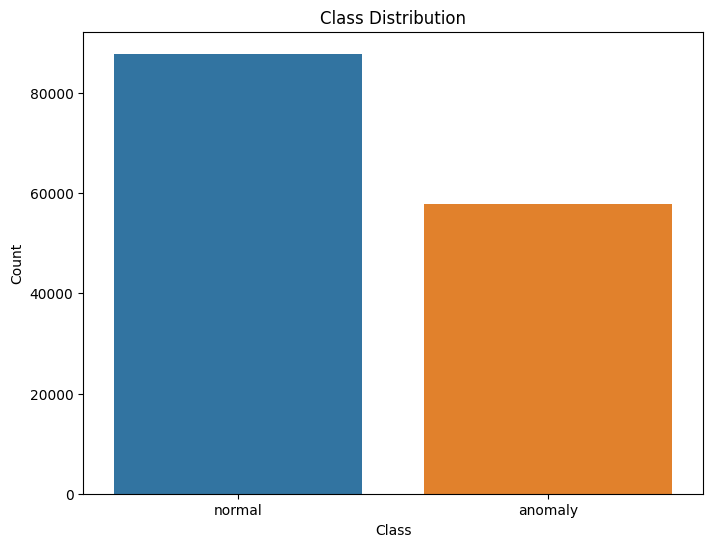

In [ ]:
plt.figure(figsize=(8, 6))
count_plot = sns.countplot(x=df["class"], palette="tab10")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
count_fig = count_plot.get_figure()

count_fig.savefig('countplot.png')

In [ ]:
print(df.iloc[0])

count                               8
src_bytes                         181
service                          http
dst_bytes                        5450
dst_host_same_src_port_rate      0.11
srv_count                           8
logged_in                           1
dst_host_count                      9
protocol_type                     tcp
dst_host_srv_diff_host_rate       0.0
same_srv_rate                     1.0
flag                               SF
class                          normal
Name: 0, dtype: object


In [ ]:
from sklearn.preprocessing import MinMaxScaler
num_cols = [
    "count", "src_bytes", "dst_bytes", "dst_host_same_src_port_rate",
    "srv_count", "dst_host_count", "dst_host_srv_diff_host_rate", "same_srv_rate"
]

scaler = MinMaxScaler()
scalar_model = scaler.fit(df[num_cols])
df[num_cols] = scalar_model.transform(df[num_cols])

In [ ]:
# prompt: dump scalar_model into joblib

import joblib

# Assuming 'scalar_model' is defined in your code as shown in the example

joblib.dump(scalar_model, 'scalar_model.joblib')


['scalar_model.joblib']

In [ ]:
df = pd.get_dummies(data = df,columns=['protocol_type','flag'])
df.columns

Index(['count', 'src_bytes', 'service', 'dst_bytes',
       'dst_host_same_src_port_rate', 'srv_count', 'logged_in',
       'dst_host_count', 'dst_host_srv_diff_host_rate', 'same_srv_rate',
       'class', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp',
       'flag_OTH', 'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR',
       'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145585 entries, 0 to 494020
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   count                        145585 non-null  float64
 1   src_bytes                    145585 non-null  float64
 2   service                      145585 non-null  object 
 3   dst_bytes                    145585 non-null  float64
 4   dst_host_same_src_port_rate  145585 non-null  float64
 5   srv_count                    145585 non-null  float64
 6   logged_in                    145585 non-null  int64  
 7   dst_host_count               145585 non-null  float64
 8   dst_host_srv_diff_host_rate  145585 non-null  float64
 9   same_srv_rate                145585 non-null  float64
 10  class                        145585 non-null  object 
 11  protocol_type_icmp           145585 non-null  bool   
 12  protocol_type_tcp            145585 non-null  bool   
 13  prot

In [ ]:
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype('uint8')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145585 entries, 0 to 494020
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   count                        145585 non-null  float64
 1   src_bytes                    145585 non-null  float64
 2   service                      145585 non-null  object 
 3   dst_bytes                    145585 non-null  float64
 4   dst_host_same_src_port_rate  145585 non-null  float64
 5   srv_count                    145585 non-null  float64
 6   logged_in                    145585 non-null  int64  
 7   dst_host_count               145585 non-null  float64
 8   dst_host_srv_diff_host_rate  145585 non-null  float64
 9   same_srv_rate                145585 non-null  float64
 10  class                        145585 non-null  object 
 11  protocol_type_icmp           145585 non-null  uint8  
 12  protocol_type_tcp            145585 non-null  uint8  
 13  prot

In [ ]:
classmap = {'normal':0,'anomaly':1}
df['class'] = df['class'].map(classmap)

In [ ]:
from sklearn.preprocessing import LabelEncoder

service_encoder = LabelEncoder()
df["service"] = service_encoder.fit_transform(df["service"])

In [ ]:
X=df.drop(columns=["class"])
X.head()

,count,src_bytes,service,dst_bytes,dst_host_same_src_port_rate,srv_count,logged_in,dst_host_count,dst_host_srv_diff_host_rate,same_srv_rate,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.015656,2.610418e-07,22,0.001057,0.11,0.015656,1,0.035294,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
1,0.015656,3.446905e-07,22,0.000094,0.05,0.015656,1,0.074510,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,0.015656,3.389216e-07,22,0.000259,0.03,0.015656,1,0.113725,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,0.011742,3.158461e-07,22,0.000259,0.03,0.011742,1,0.152941,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
4,0.011742,3.129617e-07,22,0.000394,0.02,0.011742,1,0.192157,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y=df["class"]
y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(87351, 24)
(29117, 24)
(29117, 24)
(87351,)
(29117,)
(29117,)


In [ ]:
# ML Process libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import datetime

In [ ]:
# Define number of features based on your dataset
num_features = df.shape[1] - 1  # Assuming the last column is the target

# CNN Model
start = datetime.datetime.now()

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(num_features, 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

time_taken_cnn = datetime.datetime.now() - start
print(f"Time taken for CNN model definition {time_taken_cnn.total_seconds()} ms")


In [ ]:
# Define number of features based on your dataset
num_features = df.shape[1] - 1  # Assuming the last column is the target

# CNN Model
start = datetime.datetime.now()

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(num_features, 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Time taken for CNN model definition 0.245816 ms


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
start = datetime.datetime.now()
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
time_taken_cnn = datetime.datetime.now() - start # Changed nowMMmm to now()
print(f"Time taken for CNN model compilation {time_taken_cnn.total_seconds()} ms")

Time taken for CNN model compilation 0.006396 ms


In [ ]:
start = datetime.datetime.now()
history = model.fit(X_train, y_train,batch_size=32,validation_data=(X_val, y_val),epochs=30,callbacks=[EarlyStopping(patience=3)])
time_taken_cnn = datetime.datetime.now() - start
print(f"Time taken for CNN model training {time_taken_cnn.total_seconds()} ms")

Epoch 1/30
2730/2730 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.9413 - loss: 0.2976 - val_accuracy: 0.9763 - val_loss: 0.0913
Epoch 2/30
2730/2730 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9737 - loss: 0.0976 - val_accuracy: 0.9763 - val_loss: 0.0827
Epoch 3/30
2730/2730 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.9795 - loss: 0.0830 - val_accuracy: 0.9845 - val_loss: 0.0686
Epoch 4/30
2730/2730 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9818 - loss: 0.0771 - val_accuracy: 0.9853 - val_loss: 0.0627
Epoch 5/30
2730/2730 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9839 - loss: 0.0684 - val_accuracy: 0.9858 - val_loss: 0.0584
Epoch 6/30
2730/2730 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9843 - loss: 0.0627 - val_accuracy: 0.9870 - val_loss: 0.0572
Epoch 7/30
2730/2730 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9851 - loss: 0.0574 - val_accuracy: 0.9870 - val_loss: 0.0453
Epoch 8/30
2730/2730 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9853 - loss: 

In [ ]:
from tensorflow import keras
keras.models.save_model(model, 'my_model.keras')

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

910/910 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9894 - loss: 0.0338
Test Loss: 0.0351
Test Accuracy: 0.9893


In [ ]:
# Predict class probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary class labels (assuming 0.5 threshold)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


910/910 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step
Confusion Matrix:
 [[17453    28]
 [  283 11353]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     17481
           1       1.00      0.98      0.99     11636

    accuracy                           0.99     29117
   macro avg       0.99      0.99      0.99     29117
weighted avg       0.99      0.99      0.99     29117



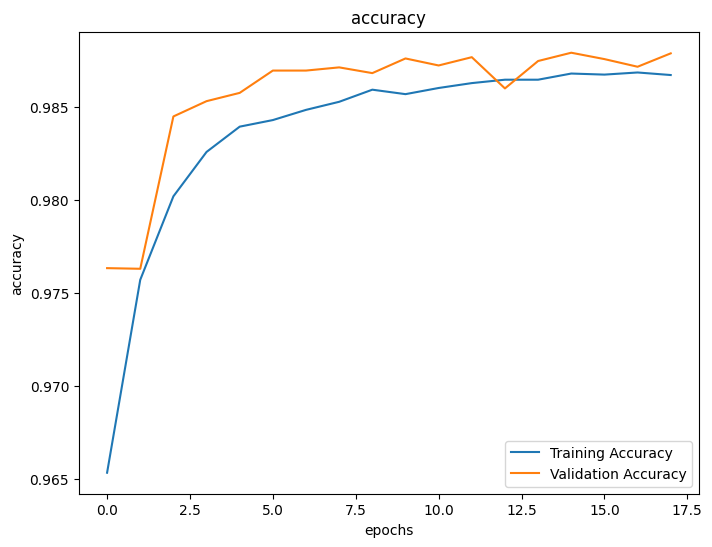

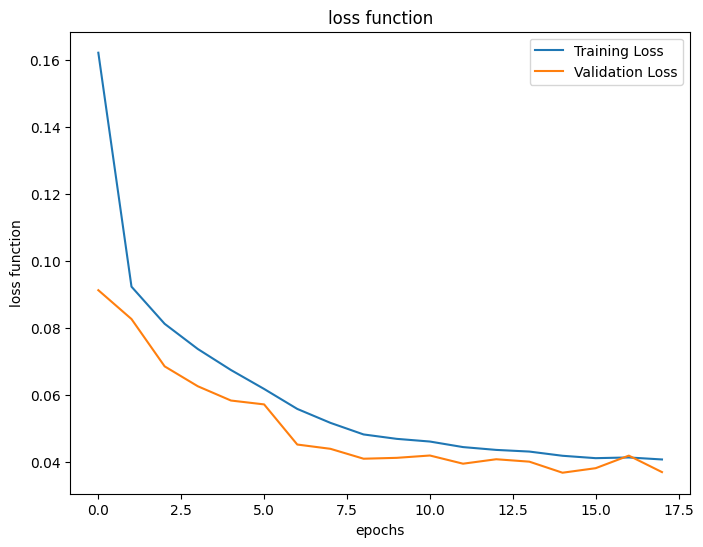

In [ ]:
train_loss=history.history["loss"]
val_loss=history.history["val_loss"]

train_accuracy=history.history["accuracy"]
val_accuracy=history.history["val_accuracy"]

plt.figure(figsize=(8,6))
plt.plot(train_accuracy, label= "Training Accuracy")
plt.plot(val_accuracy, label= "Validation Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(train_loss, label= "Training Loss")
plt.plot(val_loss, label= "Validation Loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss function")
plt.title("loss function")
plt.show()

In [ ]:
# prompt: X_test.iloc[89] how to show it in dict format

row_data = X_test.iloc[89].to_dict()
row_data


{'count': 0.43052837573385516,
 'src_bytes': 0.0,
 'service': 45.0,
 'dst_bytes': 0.0,
 'dst_host_same_src_port_rate': 0.0,
 'srv_count': 0.005870841487279843,
 'logged_in': 0.0,
 'dst_host_count': 1.0,
 'dst_host_srv_diff_host_rate': 0.0,
 'same_srv_rate': 0.01,
 'protocol_type_icmp': 0.0,
 'protocol_type_tcp': 1.0,
 'protocol_type_udp': 0.0,
 'flag_OTH': 0.0,
 'flag_REJ': 1.0,
 'flag_RSTO': 0.0,
 'flag_RSTOS0': 0.0,
 'flag_RSTR': 0.0,
 'flag_S0': 0.0,
 'flag_S1': 0.0,
 'flag_S2': 0.0,
 'flag_S3': 0.0,
 'flag_SF': 0.0,
 'flag_SH': 0.0}

Text(95.72222222222221, 0.5, 'Truth')

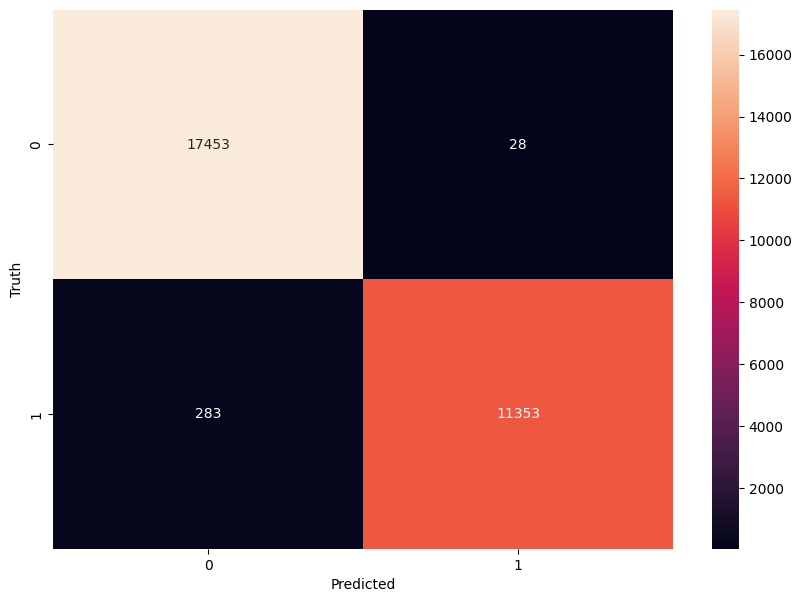

In [ ]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
index = 0
result = model.predict(np.reshape(X_test.iloc[index], (1,-1)))
print('actual value',y_test.iloc[index])
print('predicted value', "anomaly" if result>0.5 else "normal")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
actual value 0
predicted value normal


In [ ]:
import pandas as pd
import joblib  # To load the pre-trained model
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

model = keras.models.load_model("my_model.keras")




def preprocess_data(input_df):
    """Preprocess input data by applying one-hot encoding and label encoding."""

    # Define categorical columns for one-hot encoding
    categorical_columns = ['protocol_type', 'flag']
    all_categories = ['protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp',
                      'flag_OTH', 'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR',
                      'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH']

    # Perform one-hot encoding for categorical features
    input_df = pd.get_dummies(input_df, columns=categorical_columns)

    # Ensure all one-hot encoded categories exist in the dataframe
    for col in all_categories:
        if col not in input_df.columns:
            input_df[col] = 0  # Add missing columns with value 0



    service_map = {
    'http': 22, 'smtp': 50, 'finger': 17, 'domain_u': 11, 'auth': 3, 'telnet': 56,
    'ftp': 18, 'eco_i': 13, 'ntp_u': 39, 'ecr_i': 14, 'other': 40, 'private': 45,
    'pop_3': 43, 'ftp_data': 19, 'rje': 48, 'time': 59, 'mtp': 31, 'link': 29,
    'remote_job': 47, 'gopher': 20, 'ssh': 52, 'name': 32, 'whois': 65, 'domain': 10,
    'login': 30, 'imap4': 24, 'daytime': 8, 'ctf': 7, 'nntp': 38, 'shell': 49,
    'IRC': 0, 'nnsp': 37, 'http_443': 23, 'exec': 16, 'printer': 44, 'efs': 15,
    'courier': 5, 'uucp': 62, 'klogin': 26, 'kshell': 27, 'echo': 12, 'discard': 9,
    'systat': 55, 'supdup': 54, 'iso_tsap': 25, 'hostnames': 21, 'csnet_ns': 6,
    'pop_2': 42, 'sunrpc': 53, 'uucp_path': 63, 'netbios_ns': 34, 'netbios_ssn': 35,
    'netbios_dgm': 33, 'sql_net': 51, 'vmnet': 64, 'bgp': 4, 'Z39_50': 2, 'ldap': 28,
    'netstat': 36, 'urh_i': 60, 'X11': 1, 'urp_i': 61, 'pm_dump': 41, 'tftp_u': 57,
    'tim_i': 58, 'red_i': 46
     }

    input_df['service'] = input_df['service'].map(service_map)

    scaler = joblib.load('scalar_model.joblib')
    num_cols = [
    "count", "src_bytes", "dst_bytes", "dst_host_same_src_port_rate",
    "srv_count", "dst_host_count", "dst_host_srv_diff_host_rate", "same_srv_rate"
    ]
    input_df[num_cols] = scaler.transform(input_df[num_cols])

    return input_df

def predict_model(input_df):
    """Predict using the trained model."""
    try:
        prediction = model.predict(input_df)[0]  # Ensure scalar value
        print(f"Prediction: {prediction}")
        return "Anomaly" if prediction > 0.5 else "Normal"
    except Exception as e:
        print(f"Prediction Error: {e}")
        return None


if __name__ == "__main__":
    # Example input
    input_example = {'count': 316, 'src_bytes': 1032, 'service': 'ecr_i', 'dst_bytes': 0, 'dst_host_same_src_port_rate': 0.02, 'srv_count': 316, 'logged_in': 0, 'dst_host_count': 148, 'protocol_type': 'icmp', 'dst_host_srv_diff_host_rate': 0.0, 'same_srv_rate': 1.0, 'flag': 'SF'}
    data = pd.DataFrame([input_example])

    processed_df = preprocess_data(data)
    for col in processed_df.columns:
        if processed_df[col].dtype == 'bool':
          processed_df[col] = processed_df[col].astype('uint8')

    prediction = predict_model(processed_df)


    print(f'Predicted value: {prediction}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Prediction: [0.99554586]
Predicted value: Anomaly


In [ ]:
import pandas as pd
import joblib  # To load the pre-trained model
from tensorflow import keras

def preprocess_data(input_df):
    """Preprocess input data by applying one-hot encoding and label encoding."""
    categorical_columns = ['protocol_type', 'flag']
    all_categories = ['protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp',
                      'flag_OTH', 'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR',
                      'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH']

    input_df = pd.get_dummies(input_df, columns=categorical_columns)

    for col in all_categories:
        if col not in input_df.columns:
            input_df[col] = 0  # Add missing columns with value 0

    service_map = {
        'http': 22, 'smtp': 50, 'finger': 17, 'domain_u': 11, 'auth': 3, 'telnet': 56,
        'ftp': 18, 'eco_i': 13, 'ntp_u': 39, 'ecr_i': 14, 'other': 40, 'private': 45,
        'pop_3': 43, 'ftp_data': 19, 'rje': 48, 'time': 59, 'mtp': 31, 'link': 29,
        'remote_job': 47, 'gopher': 20, 'ssh': 52, 'name': 32, 'whois': 65, 'domain': 10,
        'login': 30, 'imap4': 24, 'daytime': 8, 'ctf': 7, 'nntp': 38, 'shell': 49,
        'IRC': 0, 'nnsp': 37, 'http_443': 23, 'exec': 16, 'printer': 44, 'efs': 15,
        'courier': 5, 'uucp': 62, 'klogin': 26, 'kshell': 27, 'echo': 12, 'discard': 9,
        'systat': 55, 'supdup': 54, 'iso_tsap': 25, 'hostnames': 21, 'csnet_ns': 6,
        'pop_2': 42, 'sunrpc': 53, 'uucp_path': 63, 'netbios_ns': 34, 'netbios_ssn': 35,
        'netbios_dgm': 33, 'sql_net': 51, 'vmnet': 64, 'bgp': 4, 'Z39_50': 2, 'ldap': 28,
        'netstat': 36, 'urh_i': 60, 'X11': 1, 'urp_i': 61, 'pm_dump': 41, 'tftp_u': 57,
        'tim_i': 58, 'red_i': 46
    }
    input_df['service'] = input_df['service'].map(service_map)

    scaler = joblib.load('scalar_model.joblib')
    num_cols = [
        "count", "src_bytes", "dst_bytes", "dst_host_same_src_port_rate",
        "srv_count", "dst_host_count", "dst_host_srv_diff_host_rate", "same_srv_rate"
    ]
    input_df[num_cols] = scaler.transform(input_df[num_cols])

    return input_df

def predict_model(input_df, model):
    """Predict using the trained model."""
    try:
        predictions = model.predict(input_df)
        return ["Anomaly" if pred > 0.5 else "Normal" for pred in predictions]
    except Exception as e:
        print(f"Prediction Error: {e}")
        return None

if __name__ == "__main__":
    model = keras.models.load_model("/content/my_model.keras")
    file_path = input("Enter the CSV file path: ")


    data = pd.read_csv(file_path)
    processed_df = preprocess_data(data)
    processed_df = processed_df.astype({col: 'uint8' for col in processed_df.select_dtypes('bool').columns})

    predictions = predict_model(processed_df, model)
    data['Prediction'] = predictions

    print(data[['Prediction']])


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Enter the CSV file path: /content/data.csv
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
  Prediction
0    Anomaly
1    Anomaly
2    Anomaly
3    Anomaly
4    Anomaly
5     Normal
6     Normal
7     Normal
8     Normal
9     Normal
